# MLB Advanced Data Sans WAR Analysis

In [1]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn pre-processing & model selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir(r"/content/drive/My Drive/DSC680")

In [4]:
# Import baseball data to DataFrames
import os
import pandas as pd

#path="/content/drive/MyDrive/DSC680/People.csv"
# Read in the CSV

df_hitters = pd.read_csv('MLB_hitters.csv')

# Select columns to use for models, and identification columns without WAR metrics ('OPS', 'WAR','runs_br','runs_field', 'bats_R', 'throws_R')

In [5]:
# Select columns to use for models, and identification columns without WAR metrics
num_cols_hitters = ['nameFirst', 'nameLast', 'HoF', 'Years_Played', 'H', 'BB', 'HR', 'AVE',
                    'OBP', 'Slug_Percent', 'OPS','RBI','R', 'SB', '2B',
                    '3B', 'AB', 'SO', 'Most Valuable Player', 'World Series MVP', 'AS_games','Gold Glove',
                    'Rookie of the Year', 'Silver Slugger', 'DPf', 'Af', 'Ef', 'YSLS', 'G_all',
                    '1963-76_percent', '1993-2009_percent', '1946-62_percent', 'G_1b_percent', '1942-45_percent',
                    'G_dh_percent', '1920-41_percent', 'G_ss_percent','post2009_percent', '1977-92_percent', 'G_2b_percent',
                    'G_3b_percent','G_of_percent', 'pre1920_percent']

# Create a new DataFrame (`data`) from the `df_hitters` using the columns above
data = df_hitters[num_cols_hitters]
#data_act = df_eligible[num_cols_hitters]

# Return the first rows of `data`
print(data.head())

#'OPS', 'WAR','runs_br','runs_field', 'bats_R', 'throws_R'

  nameFirst     nameLast  HoF  Years_Played    H   BB  HR       AVE       OBP  \
0     Frank  Abercrombie  0.0             1    0    0   0  0.000000  0.000000   
1       Bob         Addy  0.0             6  341   20   1  0.277011  0.288569   
2       Art      Allison  0.0             5  188    5   1  0.253711  0.258713   
3        Al       Barker  0.0             1    1    1   0  0.250000  0.400000   
4      Ross       Barnes  0.0             9  860  116   6  0.359682  0.389310   

   Slug_Percent  ...  1942-45_percent  G_dh_percent  1920-41_percent  \
0      0.000000  ...              0.0           0.0              0.0   
1      0.329813  ...              0.0           0.0              0.0   
2      0.304993  ...              0.0           0.0              0.0   
3      0.250000  ...              0.0           0.0              0.0   
4      0.467587  ...              0.0           0.0              0.0   

   G_ss_percent  post2009_percent  1977-92_percent  G_2b_percent  \
0      1.000

In [6]:
'''
# Select columns to use for models, and identification columns
num_cols_hitters = ['nameFirst', 'nameLast', 'HoF', 'Years_Played', 'H', 'BB', 'HR', 'AVE',
                    'OBP', 'Slug_Percent', 'OPS', 'WAR','runs_br','runs_field', 'RBI','R', 'SB', '2B',
                    '3B', 'AB', 'SO', 'Most Valuable Player', 'World Series MVP', 'AS_games','Gold Glove',
                    'Rookie of the Year', 'Silver Slugger', 'bats_R', 'throws_R', 'DPf', 'Af', 'Ef', 'YSLS', 'G_all',
                    '1963-76_percent', '1993-2009_percent', '1946-62_percent', 'G_1b_percent', '1942-45_percent',
                    'G_dh_percent', '1920-41_percent', 'G_ss_percent','post2009_percent', '1977-92_percent', 'G_2b_percent',
                    'G_3b_percent','G_of_percent', 'pre1920_percent']

# Create a new DataFrame (`data`) from the `df_hitters` using the columns above
data = df_hitters[num_cols_hitters]
#data_act = df_eligible[num_cols_hitters]

# Return the first rows of `data`
print(data.head())
'''

"\n# Select columns to use for models, and identification columns\nnum_cols_hitters = ['nameFirst', 'nameLast', 'HoF', 'Years_Played', 'H', 'BB', 'HR', 'AVE',\n                    'OBP', 'Slug_Percent', 'OPS', 'WAR','runs_br','runs_field', 'RBI','R', 'SB', '2B',\n                    '3B', 'AB', 'SO', 'Most Valuable Player', 'World Series MVP', 'AS_games','Gold Glove',\n                    'Rookie of the Year', 'Silver Slugger', 'bats_R', 'throws_R', 'DPf', 'Af', 'Ef', 'YSLS', 'G_all',\n                    '1963-76_percent', '1993-2009_percent', '1946-62_percent', 'G_1b_percent', '1942-45_percent',\n                    'G_dh_percent', '1920-41_percent', 'G_ss_percent','post2009_percent', '1977-92_percent', 'G_2b_percent',\n                    'G_3b_percent','G_of_percent', 'pre1920_percent']\n\n# Create a new DataFrame (`data`) from the `df_hitters` using the columns above\ndata = df_hitters[num_cols_hitters]\n#data_act = df_eligible[num_cols_hitters]\n\n# Return the first rows of `data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nameFirst             6644 non-null   object 
 1   nameLast              6644 non-null   object 
 2   HoF                   6644 non-null   float64
 3   Years_Played          6644 non-null   int64  
 4   H                     6644 non-null   int64  
 5   BB                    6644 non-null   int64  
 6   HR                    6644 non-null   int64  
 7   AVE                   6644 non-null   float64
 8   OBP                   6644 non-null   float64
 9   Slug_Percent          6644 non-null   float64
 10  OPS                   6644 non-null   float64
 11  RBI                   6644 non-null   float64
 12  R                     6644 non-null   int64  
 13  SB                    6644 non-null   float64
 14  2B                    6644 non-null   int64  
 15  3B                   

In [8]:
# Save data as a backup: data2
#data2 = df_hitters2

In [9]:
#data2.head()

In [10]:
# Print length of `data`
print(len(data))

# Print how many Hall of Fame members are in data
print(len(data[data['HoF'] == 1]))

6644
70


In [11]:
'''
# Print length of `data`
print(len(data_act))

# Print how many Hall of Fame members are in data
print(len(data_act[data_act['HoF'] == 1]))
'''

"\n# Print length of `data`\nprint(len(data_act))\n\n# Print how many Hall of Fame members are in data\nprint(len(data_act[data_act['HoF'] == 1]))\n"

In [12]:
data.head()

,nameFirst,nameLast,HoF,Years_Played,H,BB,HR,AVE,OBP,Slug_Percent,...,1942-45_percent,G_dh_percent,1920-41_percent,G_ss_percent,post2009_percent,1977-92_percent,G_2b_percent,G_3b_percent,G_of_percent,pre1920_percent
0,Frank,Abercrombie,0.0,1,0,0,0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0
1,Bob,Addy,0.0,6,341,20,1,0.277011,0.288569,0.329813,...,0.0,0.0,0.0,0.014599,0.0,0.0,0.288321,0.018248,0.686131,1.0
2,Art,Allison,0.0,5,188,5,1,0.253711,0.258713,0.304993,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.023810,0.000000,0.785714,1.0
3,Al,Barker,0.0,1,1,1,0,0.250000,0.400000,0.250000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.0
4,Ross,Barnes,0.0,9,860,116,6,0.359682,0.389310,0.467587,...,0.0,0.0,0.0,0.282565,0.0,0.0,0.693387,0.026052,0.008016,1.0


In [13]:
X = data.copy()

In [14]:
# Set a random state
rs= 42

# Create `target` Series
target = data['HoF']

# Create `features` DataFrame
feature = data.copy()
feature = data.drop(['nameFirst', 'nameLast','HoF'], axis=1)


# Check Data Imbalance

In [15]:
# Count the target value
target.value_counts()

0.0    6574
1.0      70
Name: HoF, dtype: int64

<Axes: ylabel='HoF'>

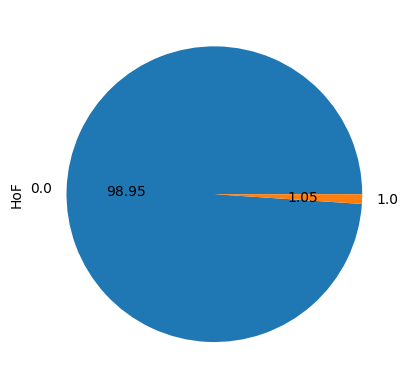

In [16]:
# Show pie plot
target.value_counts().plot.pie(autopct='%.2f')

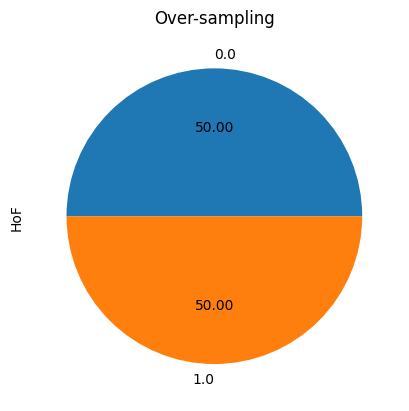

In [17]:
# Random Oversampling

from imblearn.over_sampling import RandomOverSampler # Float
ros = RandomOverSampler (sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample (feature, target)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [18]:
# Count the oversampled target value
y_res.value_counts()

0.0    6574
1.0    6574
Name: HoF, dtype: int64

In [19]:
# Split the re-sampled data and train
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = rs)

In [20]:
# Creating Logistic Regression model
model = LogisticRegression(random_state = rs)
model.fit(X_res_train, y_res_train)
model.score(X_res_test, y_res_test)

0.9896070975918885

In [21]:
# Load packages for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

In [22]:
# Instantiate a random forest model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, min_samples_split=2, random_state=42)

#Train the model on training data
rf.fit(X_res_train, y_res_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [23]:
# Use the forest's predict method on the test data
y_res_pred_rf = rf.predict(X_res_test)

In [24]:
# Print the classification report
print(classification_report(y_res_test, y_res_pred_rf))

print("Test Accuracy: {}%".format(round(rf.score(X_res_test, y_res_test)*100,2)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1995
         1.0       1.00      1.00      1.00      1950

    accuracy                           1.00      3945
   macro avg       1.00      1.00      1.00      3945
weighted avg       1.00      1.00      1.00      3945

Test Accuracy: 99.9%


In [25]:
# cross-validation
scores = cross_val_score(estimator = model, X = X_res_train, y = y_res_train, cv = 10)
print('CV accuracy: %s' % scores)
print('CV accuracy range: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: [0.98371336 0.98479913 0.99131379 0.99021739 0.98804348 0.99673913
 0.99130435 0.98804348 0.98804348 0.99021739]
CV accuracy range: 0.989 +/- 0.003
